In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Droping unnessary features from the dataset.

In [3]:
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

# Null values

In [4]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

As shown above Age,Cabin and Embarked have missing values.Embarked is a categorical feature so replacing missing values with mode.For age we use median imputation and dropping cabin as it consists of several missing values.

In [5]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
train['Age'].fillna(train['Age'].median(), inplace = True)
train.drop(['Cabin'],axis=1,inplace=True)
train.isnull().sum().sum()

0

# Visualisations

# Survived

First visualising survived feature,as shown below most no of people are not survived.

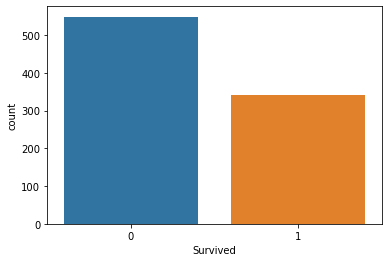

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(train['Survived'])

# Embarked

Now Embarked vs survived,as shown below most people are embarked from S,where as C has more survived people than not survived ones.

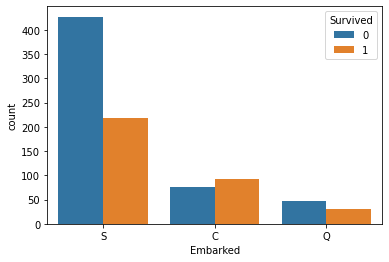

In [7]:
sns.countplot(x='Embarked',hue='Survived',data=train)

# Sex

As shown below females survived most than males.

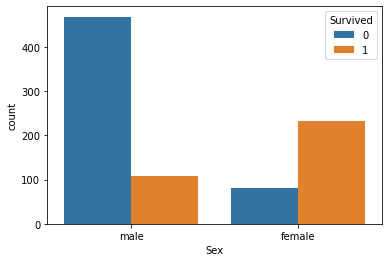

In [8]:
sns.countplot(x='Sex',hue='Survived',data=train)

# Age

Age is continuous faeture,so i used histogram for plotting.As shown below most people age is between 18 and 32.

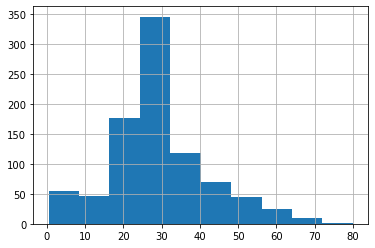

In [9]:
train['Age'].hist()

Age vs Survived.Below i used kde plot,as shown below most people not survived are b/w 20 and 40 years.

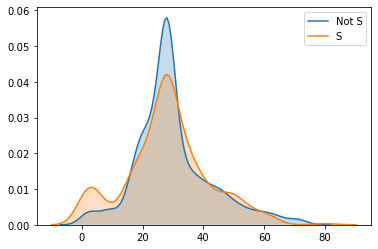

In [10]:
sns.kdeplot(train[train['Survived']==0]['Age'],shade=True)
sns.kdeplot(train[train['Survived']==1]['Age'],shade=True)
plt.legend(['Not S','S'])

SibSp-Number of siblings/spouses,as shown below most people has zero sibsp.

# SibSp

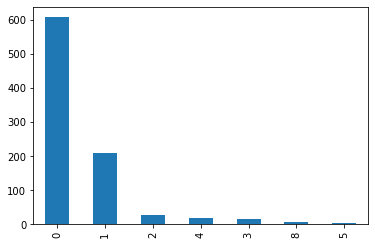

In [11]:
train['SibSp'].value_counts().plot(kind='bar')

SibSp vs Survived.As shown below people having 1 or 2 sibsp are survived most.

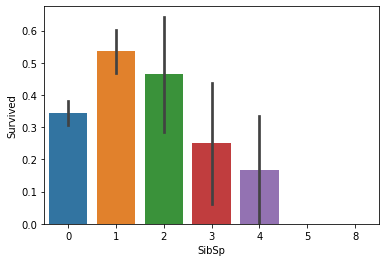

In [12]:
sns.barplot(train['SibSp'],y='Survived',data=train)

Parch-no of parents/children,As shown below most of couples has zero children.

# Parch

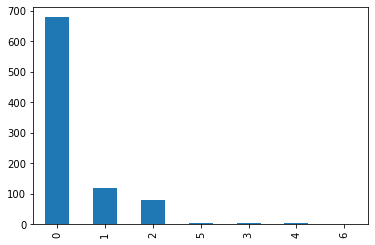

In [13]:
train['Parch'].value_counts().plot(kind='bar')

Parch vs Survived.As shown below people having 3 children survived the most.

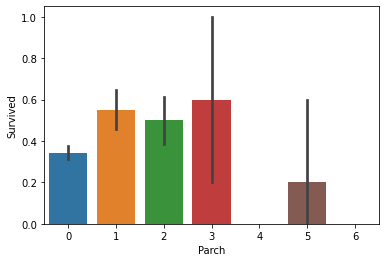

In [14]:
sns.barplot(x=train['Parch'],y='Survived',data=train)

Fare-By using histogram we can see that fare is 0-50.

# Fare

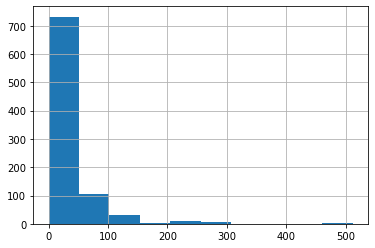

In [15]:
train['Fare'].hist()

# Converting age and fare faetures into bins

In [16]:
train['Age'].describe()
def binning(x):
    if x>=0 and x<22:
        return 0
    elif x>=22 and x<28:
        return 1
    elif x>=28 and x<35:
        return 2
    else:
        return 3
train['Age']=train['Age'].map(binning)   

In [17]:
train['Fare']=train['Fare'].astype('int64')
train['Fare'].describe()
def bin(x):
    if x>=0 and x<7:
        return 0
    elif x>=7 and x<14:
        return 1
    elif x>=14 and x<31:
        return 2
    else:
        return 3
train['Fare']=train['Fare'].map(bin)   

# Encoding categorical features.

In [18]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
train['Sex']=lc.fit_transform(train['Sex'])
train['Embarked']=lc.fit_transform(train['Embarked'])

In [19]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,1,2
1,1,1,0,3,1,0,3,0
2,1,3,0,1,0,0,1,2
3,1,1,0,3,1,0,3,2
4,0,3,1,3,0,0,1,2


# Splitting the data into train,test.

In [20]:
Y=train['Survived']
X=train.drop(['Survived'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Importing necessary libraries and staring sequential model.The sequential API allows you to create models layer-by-layer for most problems.

# Model 

In [21]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
input_dimension=X.shape[1]

model=Sequential()


Now we are adding layers to our model.First an input layer,one hidden layer and output layer.Finally compiling the model with adam optimizer and fitting the data with 100 epochs and a batch size of 9.

In [22]:
model.add(Dense(4,input_dim=input_dimension,activation='relu',kernel_initializer="uniform"))
model.add(Dense(2,activation='relu',kernel_initializer="uniform"))
model.add(Dense(1,activation='sigmoid',kernel_initializer="uniform"))
#model.summary()
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['Accuracy'])
model_history=model.fit(X_train,Y_train,batch_size=9,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
80/80 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.0000e+00 - val_loss: 0.6855 - val_accuracy: 0.0000e+00
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.0000e+00 - val_loss: 0.6725 - val_accuracy: 0.0000e+00
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.0000e+00 - val_loss: 0.6568 - val_accuracy: 0.0000e+00
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.0000e+00 - val_loss: 0.6432 - val_accuracy: 0.0000e+00
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6401 - accuracy: 0.0000e+00 - val_loss: 0.6290 - val_accuracy: 0.0000e+00
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.0000e+00 - val_loss: 0.6098 - val_accuracy: 0.0000e+00
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6081 - accuracy: 0.0000e+00 - v

Epoch 56/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.0000e+00 - val_loss: 0.4098 - val_accuracy: 0.0000e+00
Epoch 57/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.0000e+00 - val_loss: 0.4096 - val_accuracy: 0.0000e+00
Epoch 58/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.0000e+00 - val_loss: 0.4112 - val_accuracy: 0.0000e+00
Epoch 59/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.0000e+00 - val_loss: 0.4106 - val_accuracy: 0.0000e+00
Epoch 60/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.0000e+00 - val_loss: 0.4097 - val_accuracy: 0.0000e+00
Epoch 61/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.0000e+00 - val_loss: 0.4100 - val_accuracy: 0.0000e+00
Epoch 62/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.0000e

# Plotting the loss over the epochs

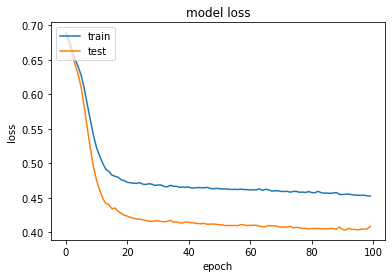

In [23]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Finding Accuracy

In [24]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
score

0.8100558659217877

# Please upvote if you like,any suggestions or mistakes put it in comments,Thank you.